In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows', None)


In [3]:
df = pd.read_csv('gurgaon_properties_missing_value_imputation.csv')

In [4]:
df.shape

(3566, 18)

In [5]:
df.head()

property_type                      society      sector  price  \
0          flat      signature global park 4   sector 36   0.82   
1          flat             smart world gems   sector 89   0.95   
2          flat                pyramid elite   sector 86   0.46   
3          flat       breez global hill view  sohna road   0.32   
4          flat  bestech park view sanskruti   sector 92   1.60   

   price_per_sqft  bedRoom  bathroom balcony  floorNum       agePossession  \
0          7586.0      3.0       2.0       2       2.0        New Property   
1          8597.0      2.0       2.0       2       4.0        New Property   
2          6751.0      2.0       2.0       1       0.0  Under Construction   
3          5470.0      2.0       2.0       1      17.0        New Property   
4          8020.0      3.0       4.0      3+      10.0      Relatively New   

   built_up_area  study room  servant room  store room  pooja room  others  \
0         850.00         0.0           0.0         0.0         0.0     0.0   
1        1226.00         1.0           1.0         0.0         0.0     0.0   
2         681.41         0.0           0.0         0.0         0.0     0.0   
3        1000.00         0.0           0.0         0.0         0.0     0.0   
4        1615.00         0.0           1.0         0.0         0.0     1.0   

   furnishing_type  luxury_score  
0              0.0           8.0  
1              0.0          38.0  
2              0.0          15.0  
3              0.0          49.0  
4              1.0         174.0

In [6]:
train_df = df.drop(columns=['society', 'price_per_sqft'])

In [7]:
train_df.head()

property_type      sector  price  bedRoom  bathroom balcony  floorNum  \
0          flat   sector 36   0.82      3.0       2.0       2       2.0   
1          flat   sector 89   0.95      2.0       2.0       2       4.0   
2          flat   sector 86   0.46      2.0       2.0       1       0.0   
3          flat  sohna road   0.32      2.0       2.0       1      17.0   
4          flat   sector 92   1.60      3.0       4.0      3+      10.0   

        agePossession  built_up_area  study room  servant room  store room  \
0        New Property         850.00         0.0           0.0         0.0   
1        New Property        1226.00         1.0           1.0         0.0   
2  Under Construction         681.41         0.0           0.0         0.0   
3        New Property        1000.00         0.0           0.0         0.0   
4      Relatively New        1615.00         0.0           1.0         0.0   

   pooja room  others  furnishing_type  luxury_score  
0         0.0     0.0              0.0           8.0  
1         0.0     0.0              0.0          38.0  
2         0.0     0.0              0.0          15.0  
3         0.0     0.0              0.0          49.0  
4         0.0     1.0              1.0         174.0

# luxury Score

<Axes: >

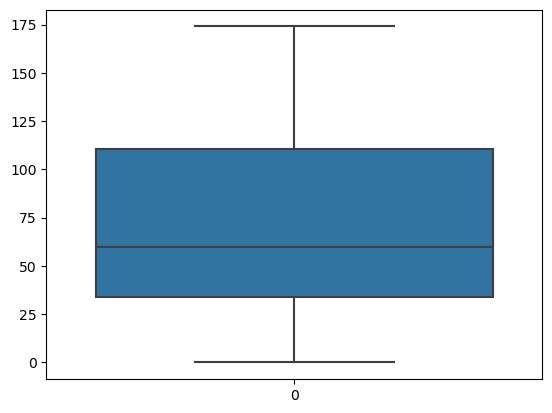

In [8]:
sns.boxplot(df['luxury_score'])

In [9]:
def categorize_luxury(score):
    if 0 <= score <50:
        return 'low'
    elif 50 <= score < 150:
        return 'medium'
    elif 150 <= score <=175:
        return 'high'
    else:
        return None # or "Undefined" or any other label for scores outside the defined bin
    
    

In [10]:
train_df['luxury_category'] = train_df['luxury_score'].apply(categorize_luxury)

In [11]:
train_df.head()

property_type      sector  price  bedRoom  bathroom balcony  floorNum  \
0          flat   sector 36   0.82      3.0       2.0       2       2.0   
1          flat   sector 89   0.95      2.0       2.0       2       4.0   
2          flat   sector 86   0.46      2.0       2.0       1       0.0   
3          flat  sohna road   0.32      2.0       2.0       1      17.0   
4          flat   sector 92   1.60      3.0       4.0      3+      10.0   

        agePossession  built_up_area  study room  servant room  store room  \
0        New Property         850.00         0.0           0.0         0.0   
1        New Property        1226.00         1.0           1.0         0.0   
2  Under Construction         681.41         0.0           0.0         0.0   
3        New Property        1000.00         0.0           0.0         0.0   
4      Relatively New        1615.00         0.0           1.0         0.0   

   pooja room  others  furnishing_type  luxury_score luxury_category  
0         0.0     0.0              0.0           8.0             low  
1         0.0     0.0              0.0          38.0             low  
2         0.0     0.0              0.0          15.0             low  
3         0.0     0.0              0.0          49.0             low  
4         0.0     1.0              1.0         174.0            high

## floorNum

<Axes: >

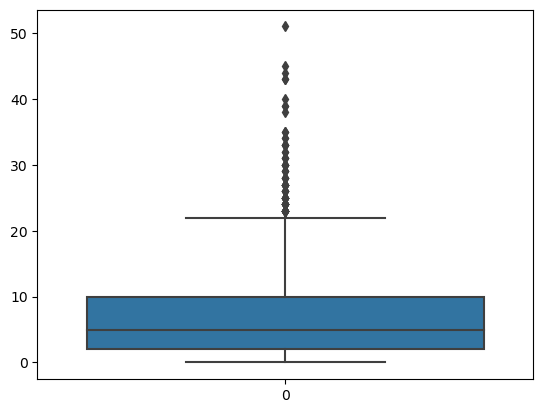

In [12]:
sns.boxplot(df['floorNum'])

In [13]:
def categorize_floor(floor):
    if 0 <= floor <=2:
        return 'Low Floor'
    elif 3 <= floor <=10:
        return 'Mid Floor'
    elif 11<= floor <=51:
        return 'High Floor'
    else:
        return None # or "Undefined" or any other label for scores outside the defined bin

In [14]:
train_df['floor_category'] = train_df['floorNum'].apply(categorize_floor)

In [15]:
train_df.head()

property_type      sector  price  bedRoom  bathroom balcony  floorNum  \
0          flat   sector 36   0.82      3.0       2.0       2       2.0   
1          flat   sector 89   0.95      2.0       2.0       2       4.0   
2          flat   sector 86   0.46      2.0       2.0       1       0.0   
3          flat  sohna road   0.32      2.0       2.0       1      17.0   
4          flat   sector 92   1.60      3.0       4.0      3+      10.0   

        agePossession  built_up_area  study room  servant room  store room  \
0        New Property         850.00         0.0           0.0         0.0   
1        New Property        1226.00         1.0           1.0         0.0   
2  Under Construction         681.41         0.0           0.0         0.0   
3        New Property        1000.00         0.0           0.0         0.0   
4      Relatively New        1615.00         0.0           1.0         0.0   

   pooja room  others  furnishing_type  luxury_score luxury_category  \
0         0.0     0.0              0.0           8.0             low   
1         0.0     0.0              0.0          38.0             low   
2         0.0     0.0              0.0          15.0             low   
3         0.0     0.0              0.0          49.0             low   
4         0.0     1.0              1.0         174.0            high   

  floor_category  
0      Low Floor  
1      Mid Floor  
2      Low Floor  
3     High Floor  
4      Mid Floor

In [16]:
train_df.drop(columns=['floorNum','luxury_score'], inplace=True)

In [17]:
train_df.drop(columns=['study room','pooja room','others'], inplace=True)

In [18]:
train_df.head()

property_type      sector  price  bedRoom  bathroom balcony  \
0          flat   sector 36   0.82      3.0       2.0       2   
1          flat   sector 89   0.95      2.0       2.0       2   
2          flat   sector 86   0.46      2.0       2.0       1   
3          flat  sohna road   0.32      2.0       2.0       1   
4          flat   sector 92   1.60      3.0       4.0      3+   

        agePossession  built_up_area  servant room  store room  \
0        New Property         850.00           0.0         0.0   
1        New Property        1226.00           1.0         0.0   
2  Under Construction         681.41           0.0         0.0   
3        New Property        1000.00           0.0         0.0   
4      Relatively New        1615.00           1.0         0.0   

   furnishing_type luxury_category floor_category  
0              0.0             low      Low Floor  
1              0.0             low      Mid Floor  
2              0.0             low      Low Floor  
3              0.0             low     High Floor  
4              1.0            high      Mid Floor

In [19]:
train_df.to_csv('gurgoan_properties_post_feature_selection V2.csv',index=False )

# Feature Selection techniques

#### Converting My categorical Data to Numerical means Encoding My Categorical Data.

In [18]:
from sklearn.preprocessing import OrdinalEncoder

#create a copy of the original data for label encoding

data_label_encoded = train_df.copy()

categorical_cols = train_df.select_dtypes(include=['object']).columns

#Apply Label encoding to categorical columns

for col in categorical_cols:
    oe = OrdinalEncoder()
    data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])
    print(oe.categories_)
    
#Splitting the dataset into training and testing sets

X_label = data_label_encoded.drop('price', axis=1)
y_label = data_label_encoded['price']

[array(['flat', 'house'], dtype=object)]
[array(['dwarka expressway', 'gwal pahari', 'manesar', 'sector 1',
       'sector 10', 'sector 102', 'sector 103', 'sector 104',
       'sector 105', 'sector 106', 'sector 107', 'sector 108',
       'sector 109', 'sector 11', 'sector 110', 'sector 111',
       'sector 112', 'sector 113', 'sector 12', 'sector 13', 'sector 14',
       'sector 15', 'sector 17', 'sector 2', 'sector 21', 'sector 22',
       'sector 23', 'sector 24', 'sector 25', 'sector 26', 'sector 27',
       'sector 28', 'sector 3', 'sector 30', 'sector 31', 'sector 33',
       'sector 36', 'sector 37', 'sector 37d', 'sector 38', 'sector 39',
       'sector 4', 'sector 40', 'sector 41', 'sector 43', 'sector 45',
       'sector 46', 'sector 47', 'sector 48', 'sector 49', 'sector 5',
       'sector 50', 'sector 51', 'sector 52', 'sector 53', 'sector 54',
       'sector 55', 'sector 56', 'sector 57', 'sector 58', 'sector 59',
       'sector 6', 'sector 60', 'sector 61', 'sector 62', 

In [19]:
X_label

property_type  sector  bedRoom  bathroom  balcony  agePossession  \
0               0.0    36.0      3.0       2.0      2.0            1.0   
1               0.0    95.0      2.0       2.0      2.0            1.0   
2               0.0    92.0      2.0       2.0      1.0            4.0   
3               0.0   103.0      2.0       2.0      1.0            1.0   
4               0.0    99.0      3.0       4.0      4.0            3.0   
5               0.0     5.0      2.0       2.0      1.0            3.0   
6               0.0     1.0      4.0       4.0      4.0            1.0   
7               0.0    11.0      3.0       3.0      4.0            3.0   
8               0.0     5.0      3.0       4.0      3.0            3.0   
9               1.0     8.0      3.0       2.0      1.0            2.0   
10              1.0    29.0      3.0       3.0      2.0            0.0   
11              1.0    12.0      3.0       2.0      0.0            3.0   
12              0.0    31.0      2.0       2.0      2.0            3.0   
13              0.0    12.0      3.0       4.0      3.0            3.0   
14              0.0    67.0      4.0       4.0      4.0            3.0   
15              1.0    18.0      2.0       4.0      2.0            3.0   
16              0.0    99.0      3.0       4.0      3.0            3.0   
17              0.0    91.0      2.0       2.0      3.0            3.0   
18              0.0    75.0      2.0       2.0      3.0            1.0   
19              0.0    91.0      3.0       4.0      4.0            1.0   
20              0.0    33.0      2.0       2.0      1.0            2.0   
21              0.0    10.0      2.0       2.0      4.0            3.0   
22              0.0    32.0      2.0       2.0      3.0            4.0   
23              0.0    23.0      1.0       1.0      1.0            0.0   
24              1.0    43.0      8.0       5.0      4.0            2.0   
25              1.0    43.0      7.0       7.0      4.0            0.0   
26              0.0    31.0      4.0       2.0      4.0            2.0   
27              1.0    41.0      1.0       1.0      0.0            0.0   
28              1.0    12.0      4.0       4.0      4.0            1.0   
29              0.0    64.0      2.0       2.0      3.0            4.0   
30              1.0    49.0      6.0       6.0      3.0            0.0   
31              0.0    86.0      2.0       2.0      3.0            3.0   
32              0.0    67.0      3.0       3.0      3.0            4.0   
33              0.0    68.0      3.0       3.0      3.0            0.0   
34              1.0    95.0      2.0       2.0      2.0            4.0   
35              0.0    92.0      3.0       3.0      4.0            3.0   
36              1.0    48.0      4.0       4.0      4.0            3.0   
37              1.0    12.0      5.0       6.0      4.0            0.0   
38              0.0    52.0      4.0       4.0      3.0            3.0   
39              0.0    37.0      3.0       3.0      3.0            3.0   
40              0.0    15.0      2.0       2.0      2.0            3.0   
41              0.0    69.0      3.0       3.0      3.0            0.0   
42              1.0    31.0      4.0       3.0      3.0            2.0   
43              0.0    15.0      3.0       4.0      2.0            0.0   
44              0.0    17.0      3.0       3.0      4.0            3.0   
45              1.0    19.0      3.0       6.0      2.0            2.0   
46              0.0    63.0      3.0       2.0      3.0            4.0   
47              0.0    17.0      3.0       3.0      3.0            3.0   
48              0.0    72.0      3.0       3.0      1.0            3.0   
49              0.0    95.0      3.0       2.0      0.0            4.0   
50              0.0    70.0      3.0       4.0      3.0            1.0   
51              0.0    38.0      2.0       2.0      3.0            1.0   
52              0.0    87.0      2.0       2.0      2.0            3.0   
53        

In [20]:
X_label['built_up_area'] =X_label['built_up_area'].round(1)

In [21]:
y_label

0        0.82
1        0.95
2        0.46
3        0.32
4        1.60
5        0.48
6        7.50
7        2.00
8        1.90
9        1.20
10       4.50
11       1.55
12       1.60
13       2.25
14       2.77
15       1.20
16       1.55
17       1.09
18       1.15
19       1.77
20       0.85
21       0.90
22       1.20
23       0.60
24       9.00
25       7.00
26       0.90
27       0.40
28       5.65
29       2.15
30       4.40
31       0.64
32       2.86
33       3.50
34       0.70
35       1.54
36       8.25
37       6.10
38       2.10
39       1.25
40       0.70
41       2.80
42       5.50
43       2.58
44       3.00
45       1.25
46       2.10
47       2.45
48       1.38
49       1.71
50       1.85
51       0.60
52       0.81
53       5.60
54       1.50
55       1.45
56       1.65
57       0.45
58       0.35
59       5.75
60       1.12
61       0.75
62       0.25
63       0.67
64       0.56
65       1.75
66       4.15
67       3.40
68       2.30
69       7.60
70       0.32
71    

## Applying Feature Importance techniques

### Technique 1- Correlation Analysis

In [22]:
data_label_encoded.head()

property_type  sector  price  bedRoom  bathroom  balcony  agePossession  \
0            0.0    36.0   0.82      3.0       2.0      2.0            1.0   
1            0.0    95.0   0.95      2.0       2.0      2.0            1.0   
2            0.0    92.0   0.46      2.0       2.0      1.0            4.0   
3            0.0   103.0   0.32      2.0       2.0      1.0            1.0   
4            0.0    99.0   1.60      3.0       4.0      4.0            3.0   

   built_up_area  study room  servant room  store room  pooja room  others  \
0         850.00         0.0           0.0         0.0         0.0     0.0   
1        1226.00         1.0           1.0         0.0         0.0     0.0   
2         681.41         0.0           0.0         0.0         0.0     0.0   
3        1000.00         0.0           0.0         0.0         0.0     0.0   
4        1615.00         0.0           1.0         0.0         0.0     1.0   

   furnishing_type  luxury_category  floor_category  
0              0.0              1.0             1.0  
1              0.0              1.0             2.0  
2              0.0              1.0             1.0  
3              0.0              1.0             0.0  
4              1.0              0.0             2.0

<AxesSubplot: >

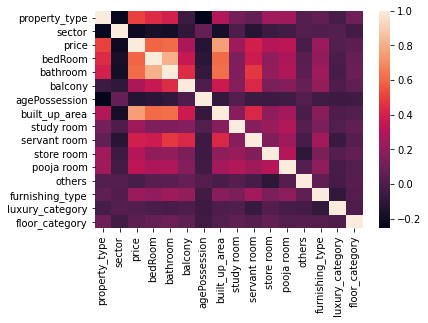

In [23]:
sns.heatmap(data_label_encoded.corr())

In [24]:
fi_df1 = data_label_encoded.corr()['price'].iloc[1:].to_frame().reset_index().rename(columns={'index':'feature','price':'corr_coeff'})
fi_df1

feature  corr_coeff
0            sector   -0.213480
1             price    1.000000
2           bedRoom    0.592093
3          bathroom    0.610680
4           balcony    0.271699
5     agePossession   -0.129639
6     built_up_area    0.750848
7        study room    0.242074
8      servant room    0.393181
9        store room    0.305971
10       pooja room    0.320840
11           others   -0.012864
12  furnishing_type    0.226082
13  luxury_category    0.009355
14   floor_category    0.043110

## Technique 2- Random Forest Feature Importance

In [42]:
from sklearn.ensemble import RandomForestRegressor

#Train a Random Forest regressor on Label encoded data

rf_label = RandomForestRegressor(n_estimators=100, random_state= 42)
rf_label.fit(X_label,y_label)

#Extract feature importance score for label encoded data
fi_df2 = pd.DataFrame({
    'feature': X_label.columns,
    'rf_importance': rf_label.feature_importances_
}).sort_values(by='rf_importance', ascending=False)

fi_df2

feature  rf_importance
6     built_up_area       0.654231
1            sector       0.103122
0     property_type       0.100483
3          bathroom       0.023990
2           bedRoom       0.022190
8      servant room       0.018520
5     agePossession       0.015414
4           balcony       0.012881
12  furnishing_type       0.009798
7        study room       0.008926
9        store room       0.008370
13  luxury_category       0.007412
14   floor_category       0.006331
10       pooja room       0.005883
11           others       0.002448

## Technique3- Gradient Boosting Feature importances


In [41]:
from sklearn.ensemble import GradientBoostingRegressor

#Train a Random Forest regressor on Label encoded data
gb_label = GradientBoostingRegressor()
gb_label.fit(X_label, y_label)

#Extract feature importance scores for label encoded data
fi_df3 = pd.DataFrame({
    'feature': X_label.columns,
    'gb_importance': gb_label.feature_importances_
    }).sort_values(by='gb_importance', ascending=False)

fi_df3

feature  gb_importance
6     built_up_area       0.688693
1            sector       0.103979
0     property_type       0.095285
2           bedRoom       0.034394
3          bathroom       0.032621
8      servant room       0.021373
9        store room       0.008965
5     agePossession       0.005090
7        study room       0.003788
12  furnishing_type       0.002989
4           balcony       0.001867
14   floor_category       0.000705
13  luxury_category       0.000133
11           others       0.000118
10       pooja room       0.000000

## Technique 4 - Permutation Importance

In [43]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size= 0.2, random_state=42)

#Train a Random Forest regressor on label encoded data

rf_label = RandomForestRegressor(n_estimators=100, random_state= 42)
rf_label.fit(X_train_label, y_train_label)

# Calculate Permutation Importance
perm_importance = permutation_importance(rf_label, X_test_label, y_test_label, n_repeats= 30, random_state= 42)

# Organize results into a DataFrame

fi_df4 = pd.DataFrame({
    'feature': X_label.columns,
    'permutation_importance': perm_importance.importances_mean
}).sort_values(by='permutation_importance', ascending=False)

fi_df4

feature  permutation_importance
6     built_up_area                0.720646
0     property_type                0.161927
1            sector                0.148864
2           bedRoom                0.023778
3          bathroom                0.010861
8      servant room                0.010053
4           balcony                0.007912
5     agePossession                0.003745
11           others                0.000704
14   floor_category                0.000574
12  furnishing_type               -0.000756
10       pooja room               -0.002388
13  luxury_category               -0.005155
9        store room               -0.006364
7        study room               -0.008691

## Technique 5 - LASSO

In [44]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

#standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label)

#Train a LASSO regression model
#We will use a relatively small value for alppha (the regulariation strength) for demonstration purposes.

lasso = Lasso(alpha=0.01, random_state= 42)
lasso.fit(X_scaled, y_label)

#Extract coefficients
fi_df5 = pd.DataFrame({
    'feature':X_label.columns,
    'lasso_coeff': lasso.coef_
}).sort_values(by='lasso_coeff', ascending= False)

fi_df5


feature  lasso_coeff
6     built_up_area     1.519000
0     property_type     0.711297
3          bathroom     0.269416
9        store room     0.198780
7        study room     0.169683
8      servant room     0.162493
12  furnishing_type     0.161017
10       pooja room     0.071699
13  luxury_category     0.058201
2           bedRoom     0.006946
5     agePossession     0.000000
14   floor_category    -0.009311
11           others    -0.017068
4           balcony    -0.050079
1            sector    -0.064388

## Technique 6- Recursive Feature Elimination (RFE)

In [45]:
from sklearn.feature_selection import RFE

# Initialize the base estimator
estimator = RandomForestRegressor()

# Apply RFE on the label-encoded and standardized training data
selector_label = RFE(estimator, n_features_to_select=X_label.shape[1], step=1)
selector_label = selector_label.fit(X_label, y_label)

# Get the selected features based on RFE
selected_features = X_label.columns[selector_label.support_]

# Extract the coefficients for the selected features from the underlying linear regression model
selected_coefficients = selector_label.estimator_.feature_importances_

# Organize the results into a DataFrame
fi_df6 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

fi_df6

feature  rfe_score
6     built_up_area   0.650132
1            sector   0.105515
0     property_type   0.099545
2           bedRoom   0.023953
3          bathroom   0.023504
8      servant room   0.021891
5     agePossession   0.014445
4           balcony   0.012472
12  furnishing_type   0.009460
7        study room   0.008439
9        store room   0.008198
13  luxury_category   0.007259
14   floor_category   0.006365
10       pooja room   0.005831
11           others   0.002991

## Technique 7- Linear Regression Weights

In [46]:
#Train a Linear Regression model on the label-encoded and standardized training data
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_scaled, y_label)

#Extract the coefficients
fi_df7= pd.DataFrame({
    'feature':X_label.columns,
    'reg_coeffs': lin_reg.coef_
}).sort_values(by='reg_coeffs', ascending=False)

fi_df7


feature  reg_coeffs
6     built_up_area    1.521613
0     property_type    0.713435
3          bathroom    0.275430
9        store room    0.203130
7        study room    0.177300
8      servant room    0.172205
12  furnishing_type    0.170570
10       pooja room    0.074589
13  luxury_category    0.070153
2           bedRoom    0.009833
5     agePossession    0.008972
14   floor_category   -0.019869
11           others   -0.025310
4           balcony   -0.072812
1            sector   -0.073560

## Technique 8- SHAP

In [35]:
!pip install shap

In [36]:
import shap

#compute SHAP values using the trained Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_label, y_label)

explainer = shap.TreeExplainer(rf)
shap_values= explainer.shap_values(X_label)

#summing the absolute SHAP values across all samples to get on overall measure of feature importance
shap_sum = np.abs(shap_values).mean(axis=0)

shap_values

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


array([[-1.82369444e-01,  1.34506359e-01, -3.54528901e-02, ...,
        -1.27367492e-02, -2.11040891e-03, -5.35711340e-03],
       [-1.95094053e-01, -3.79252626e-01, -4.42558983e-02, ...,
        -9.81573750e-03, -5.37016363e-03, -3.79228018e-03],
       [-1.77661202e-01, -2.48917465e-01, -5.30734189e-02, ...,
        -1.13866715e-02, -4.61338840e-03, -2.30921200e-04],
       ...,
       [-1.89271932e-01,  7.13907688e-02, -1.05679468e-02, ...,
         3.41990511e-03,  1.31658082e-02, -4.40033994e-03],
       [ 1.33008929e+00,  9.87475613e-01,  3.62183995e-01, ...,
         1.02565464e-01,  6.31185712e-02,  9.91368447e-03],
       [-3.13721562e-01,  1.21386741e-02, -2.55063577e-02, ...,
         5.64385909e-03, -1.00733245e-02,  3.20980911e-02]])

In [47]:
fi_df8 = pd.DataFrame({
    'feature': X_label.columns,
    'SHAP_score': np.abs(shap_values).mean(axis=0)
}).sort_values(by='SHAP_score', ascending = False)

fi_df8

feature  SHAP_score
6     built_up_area    1.257240
0     property_type    0.470270
1            sector    0.379284
3          bathroom    0.109163
8      servant room    0.094183
2           bedRoom    0.051508
4           balcony    0.042726
12  furnishing_type    0.028121
5     agePossession    0.027451
14   floor_category    0.023700
7        study room    0.022046
9        store room    0.018242
13  luxury_category    0.016126
10       pooja room    0.010464
11           others    0.006720

In [48]:
final_fi_df = (fi_df1.merge(fi_df2, on='feature').merge(fi_df3, on='feature').merge(fi_df4, on='feature').
merge(fi_df5, on='feature').merge(fi_df6, on='feature').merge(fi_df7, on='feature').
merge(fi_df8, on='feature').set_index('feature'))

In [49]:
final_fi_df

corr_coeff  rf_importance  gb_importance  \
feature                                                     
sector            -0.213480       0.103122       0.103979   
bedRoom            0.592093       0.022190       0.034394   
bathroom           0.610680       0.023990       0.032621   
balcony            0.271699       0.012881       0.001867   
agePossession     -0.129639       0.015414       0.005090   
built_up_area      0.750848       0.654231       0.688693   
study room         0.242074       0.008926       0.003788   
servant room       0.393181       0.018520       0.021373   
store room         0.305971       0.008370       0.008965   
pooja room         0.320840       0.005883       0.000000   
others            -0.012864       0.002448       0.000118   
furnishing_type    0.226082       0.009798       0.002989   
luxury_category    0.009355       0.007412       0.000133   
floor_category     0.043110       0.006331       0.000705   

                 permutation_importance  lasso_coeff  rfe_score  reg_coeffs  \
feature                                                                       
sector                         0.148864    -0.064388   0.105515   -0.073560   
bedRoom                        0.023778     0.006946   0.023953    0.009833   
bathroom                       0.010861     0.269416   0.023504    0.275430   
balcony                        0.007912    -0.050079   0.012472   -0.072812   
agePossession                  0.003745     0.000000   0.014445    0.008972   
built_up_area                  0.720646     1.519000   0.650132    1.521613   
study room                    -0.008691     0.169683   0.008439    0.177300   
servant room                   0.010053     0.162493   0.021891    0.172205   
store room                    -0.006364     0.198780   0.008198    0.203130   
pooja room                    -0.002388     0.071699   0.005831    0.074589   
others                         0.000704    -0.017068   0.002991   -0.025310   
furnishing_type               -0.000756     0.161017   0.009460    0.170570   
luxury_category               -0.005155     0.058201   0.007259    0.070153   
floor_category                 0.000574    -0.009311   0.006365   -0.019869   

                 SHAP_score  
feature                      
sector             0.379284  
bedRoom            0.051508  
bathroom           0.109163  
balcony            0.042726  
agePossession      0.027451  
built_up_area      1.257240  
study room         0.022046  
servant room       0.094183  
store room         0.018242  
pooja room         0.010464  
others             0.006720  
furnishing_type    0.028121  
luxury_category    0.016126  
floor_category     0.023700

In [50]:
#normalize the score
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)

In [51]:
final_fi_df[['rf_importance','gb_importance','permutation_importance','rfe_score','SHAP_score']].mean(axis=1).sort_values(ascending=False)

feature
built_up_area      0.722067
sector             0.138640
bathroom           0.030630
bedRoom            0.028055
servant room       0.024955
balcony            0.011892
agePossession      0.011220
furnishing_type    0.007468
store room         0.006004
floor_category     0.005375
study room         0.004886
luxury_category    0.003694
pooja room         0.003077
others             0.002035
dtype: float64

In [52]:
#to drop pooja room, study room, others
X_label

property_type  sector  bedRoom  bathroom  balcony  agePossession  \
0               0.0    36.0      3.0       2.0      2.0            1.0   
1               0.0    95.0      2.0       2.0      2.0            1.0   
2               0.0    92.0      2.0       2.0      1.0            4.0   
3               0.0   103.0      2.0       2.0      1.0            1.0   
4               0.0    99.0      3.0       4.0      4.0            3.0   
5               0.0     5.0      2.0       2.0      1.0            3.0   
6               0.0     1.0      4.0       4.0      4.0            1.0   
7               0.0    11.0      3.0       3.0      4.0            3.0   
8               0.0     5.0      3.0       4.0      3.0            3.0   
9               1.0     8.0      3.0       2.0      1.0            2.0   
10              1.0    29.0      3.0       3.0      2.0            0.0   
11              1.0    12.0      3.0       2.0      0.0            3.0   
12              0.0    31.0      2.0       2.0      2.0            3.0   
13              0.0    12.0      3.0       4.0      3.0            3.0   
14              0.0    67.0      4.0       4.0      4.0            3.0   
15              1.0    18.0      2.0       4.0      2.0            3.0   
16              0.0    99.0      3.0       4.0      3.0            3.0   
17              0.0    91.0      2.0       2.0      3.0            3.0   
18              0.0    75.0      2.0       2.0      3.0            1.0   
19              0.0    91.0      3.0       4.0      4.0            1.0   
20              0.0    33.0      2.0       2.0      1.0            2.0   
21              0.0    10.0      2.0       2.0      4.0            3.0   
22              0.0    32.0      2.0       2.0      3.0            4.0   
23              0.0    23.0      1.0       1.0      1.0            0.0   
24              1.0    43.0      8.0       5.0      4.0            2.0   
25              1.0    43.0      7.0       7.0      4.0            0.0   
26              0.0    31.0      4.0       2.0      4.0            2.0   
27              1.0    41.0      1.0       1.0      0.0            0.0   
28              1.0    12.0      4.0       4.0      4.0            1.0   
29              0.0    64.0      2.0       2.0      3.0            4.0   
30              1.0    49.0      6.0       6.0      3.0            0.0   
31              0.0    86.0      2.0       2.0      3.0            3.0   
32              0.0    67.0      3.0       3.0      3.0            4.0   
33              0.0    68.0      3.0       3.0      3.0            0.0   
34              1.0    95.0      2.0       2.0      2.0            4.0   
35              0.0    92.0      3.0       3.0      4.0            3.0   
36              1.0    48.0      4.0       4.0      4.0            3.0   
37              1.0    12.0      5.0       6.0      4.0            0.0   
38              0.0    52.0      4.0       4.0      3.0            3.0   
39              0.0    37.0      3.0       3.0      3.0            3.0   
40              0.0    15.0      2.0       2.0      2.0            3.0   
41              0.0    69.0      3.0       3.0      3.0            0.0   
42              1.0    31.0      4.0       3.0      3.0            2.0   
43              0.0    15.0      3.0       4.0      2.0            0.0   
44              0.0    17.0      3.0       3.0      4.0            3.0   
45              1.0    19.0      3.0       6.0      2.0            2.0   
46              0.0    63.0      3.0       2.0      3.0            4.0   
47              0.0    17.0      3.0       3.0      3.0            3.0   
48              0.0    72.0      3.0       3.0      1.0            3.0   
49              0.0    95.0      3.0       2.0      0.0            4.0   
50              0.0    70.0      3.0       4.0      3.0            1.0   
51              0.0    38.0      2.0       2.0      3.0            1.0   
52              0.0    87.0      2.0       2.0      2.0            3.0   
53        

In [53]:
#With all the cols
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state= 42)

scores = cross_val_score(rf, X_label, y_label, cv=5, scoring='r2')

In [54]:
scores

array([0.83909463, 0.81426976, 0.821557  , 0.79188195, 0.83427835])

In [55]:
scores.mean()

0.8202163371121316

In [56]:
#col leaving pooja room, study room, others
rf = RandomForestRegressor(n_estimators=100, random_state=42)

cross_val_score(rf, X_label.drop(columns=['pooja room','study room', 'others']), y_label, cv=5, scoring ='r2')

array([0.83290612, 0.80051009, 0.81506471, 0.78896802, 0.84026432])

In [58]:
scores.mean()

0.8202163371121316

In [61]:
export_df = X_label.drop(columns=['pooja room','study room', 'others'])
export_df['price'] = y_label

In [65]:
export_df.to_csv('gurgoan_properties_post_feature_selection.csv',index=False )

In [64]:
export_df

property_type  sector  bedRoom  bathroom  balcony  agePossession  \
0               0.0    36.0      3.0       2.0      2.0            1.0   
1               0.0    95.0      2.0       2.0      2.0            1.0   
2               0.0    92.0      2.0       2.0      1.0            4.0   
3               0.0   103.0      2.0       2.0      1.0            1.0   
4               0.0    99.0      3.0       4.0      4.0            3.0   
5               0.0     5.0      2.0       2.0      1.0            3.0   
6               0.0     1.0      4.0       4.0      4.0            1.0   
7               0.0    11.0      3.0       3.0      4.0            3.0   
8               0.0     5.0      3.0       4.0      3.0            3.0   
9               1.0     8.0      3.0       2.0      1.0            2.0   
10              1.0    29.0      3.0       3.0      2.0            0.0   
11              1.0    12.0      3.0       2.0      0.0            3.0   
12              0.0    31.0      2.0       2.0      2.0            3.0   
13              0.0    12.0      3.0       4.0      3.0            3.0   
14              0.0    67.0      4.0       4.0      4.0            3.0   
15              1.0    18.0      2.0       4.0      2.0            3.0   
16              0.0    99.0      3.0       4.0      3.0            3.0   
17              0.0    91.0      2.0       2.0      3.0            3.0   
18              0.0    75.0      2.0       2.0      3.0            1.0   
19              0.0    91.0      3.0       4.0      4.0            1.0   
20              0.0    33.0      2.0       2.0      1.0            2.0   
21              0.0    10.0      2.0       2.0      4.0            3.0   
22              0.0    32.0      2.0       2.0      3.0            4.0   
23              0.0    23.0      1.0       1.0      1.0            0.0   
24              1.0    43.0      8.0       5.0      4.0            2.0   
25              1.0    43.0      7.0       7.0      4.0            0.0   
26              0.0    31.0      4.0       2.0      4.0            2.0   
27              1.0    41.0      1.0       1.0      0.0            0.0   
28              1.0    12.0      4.0       4.0      4.0            1.0   
29              0.0    64.0      2.0       2.0      3.0            4.0   
30              1.0    49.0      6.0       6.0      3.0            0.0   
31              0.0    86.0      2.0       2.0      3.0            3.0   
32              0.0    67.0      3.0       3.0      3.0            4.0   
33              0.0    68.0      3.0       3.0      3.0            0.0   
34              1.0    95.0      2.0       2.0      2.0            4.0   
35              0.0    92.0      3.0       3.0      4.0            3.0   
36              1.0    48.0      4.0       4.0      4.0            3.0   
37              1.0    12.0      5.0       6.0      4.0            0.0   
38              0.0    52.0      4.0       4.0      3.0            3.0   
39              0.0    37.0      3.0       3.0      3.0            3.0   
40              0.0    15.0      2.0       2.0      2.0            3.0   
41              0.0    69.0      3.0       3.0      3.0            0.0   
42              1.0    31.0      4.0       3.0      3.0            2.0   
43              0.0    15.0      3.0       4.0      2.0            0.0   
44              0.0    17.0      3.0       3.0      4.0            3.0   
45              1.0    19.0      3.0       6.0      2.0            2.0   
46              0.0    63.0      3.0       2.0      3.0            4.0   
47              0.0    17.0      3.0       3.0      3.0            3.0   
48              0.0    72.0      3.0       3.0      1.0            3.0   
49              0.0    95.0      3.0       2.0      0.0            4.0   
50              0.0    70.0      3.0       4.0      3.0            1.0   
51              0.0    38.0      2.0       2.0      3.0            1.0   
52              0.0    87.0      2.0       2.0      2.0            3.0   
53        